In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import math
import plotly.express as pl
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer


In [3]:
cwd = os.getcwd()
data_folder = cwd + '/Zone 1'

data = data_folder + '/Task1_W_Zone1.csv'
df_hist_1= pd.read_csv(data, sep = ',', engine='python')

data = data_folder + '/TaskExpVars1_W_Zone1.csv'
df_pred_1= pd.read_csv(data, sep = ',', engine='python')

data = data_folder + '/Task2_W_Zone1.csv'
df_hist_2= pd.read_csv(data, sep = ',', engine='python')

df_hist_1.rename(columns={'TIMESTAMP': 'Time', 'TARGETVAR': 'Power'}, inplace=True)
df_hist_1["Time"] = pd.to_datetime(df_hist_1["Time"], format="%Y%m%d %H:%M")

df_pred_1.rename(columns={'TIMESTAMP': 'Time', 'TARGETVAR': 'Power'}, inplace=True)
df_pred_1["Time"] = pd.to_datetime(df_pred_1["Time"], format="%Y%m%d %H:%M")

df_hist_2.rename(columns={'TIMESTAMP': 'Time', 'TARGETVAR': 'Power'}, inplace=True)

try:
    df_hist_2["Time"] = pd.to_datetime(df_hist_2["Time"], format="%Y%m%d %H:%M")
except ValueError:
    df_hist_2["Time"] = pd.to_datetime(df_hist_2["Time"], format="%Y%m%d %H:%M", errors='coerce')

df_hist_1 = df_hist_1.copy()
df_hist_1['ws'] = np.sqrt(df_hist_1['U100']**2 + df_hist_1['V100']**2) #wind speed
df_hist_1['wd'] = df_hist_1.apply(lambda row: 180/math.pi * math.atan(row['U100']/row['V100']), axis=1)
df_hist_1 = df_hist_1.drop(columns=['U10','V10', 'U100', 'V100'])

df_pred_1 = df_pred_1.copy()
df_pred_1['ws'] = np.sqrt(df_pred_1['U100']**2 + df_pred_1['V100']**2) #wind speed
df_pred_1['wd'] = df_pred_1.apply(lambda row: 180/math.pi * math.atan(row['U100']/row['V100']), axis=1)
df_pred_1 = df_pred_1.drop(columns=['U10','V10', 'U100', 'V100'])

df_hist_2 = df_hist_2.copy()
df_hist_2['ws'] = np.sqrt(df_hist_2['U100']**2 + df_hist_2['V100']**2) #wind speed
df_hist_2['wd'] = df_hist_2.apply(lambda row: 180/math.pi * math.atan(row['U100']/row['V100']), axis=1)
df_hist_2 = df_hist_2.drop(columns=['U10','V10', 'U100', 'V100'])
df_real_1 = df_hist_2[df_hist_2['Time'] >= pd.to_datetime('20121001 01:00',format="%Y%m%d %H:%M")]

# Comparación Viento - Producción

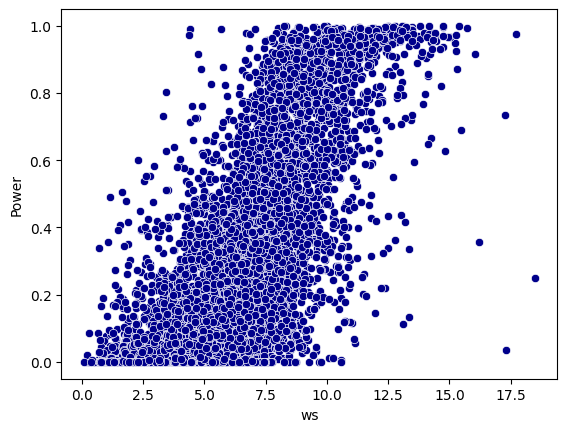

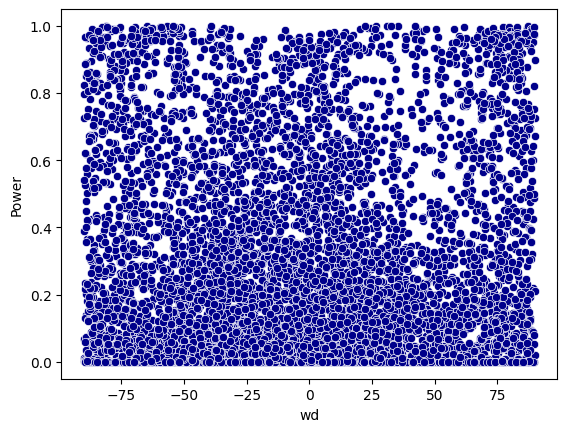

In [27]:
sns.scatterplot(x='ws', y='Power', data=df_hist_1, color='darkblue')
plt.show()
plt.figure() # Needed to plot two separated plots instead of two overlapped
sns.scatterplot(x='wd', y='Power', data=df_hist_1, color='darkblue')
plt.show()

# Comparación predicciones meteorológicas

In [28]:
pred_data_1 = df_pred_1.copy()
pred_data_1.rename(columns={'ws': 'ws_pred', 'wd': 'wd_pred'}, inplace=True)


actual_data = df_real_1.copy()
actual_data.rename(columns={'ws': 'ws_real', 'wd': 'wd_real'}, inplace=True)

df_comp = pd.merge(actual_data[['Time', 'ws_real', 'wd_real']], pred_data_1[['Time', 'ws_pred', 'wd_pred']], on='Time')

df_comp['MAE ws'] = abs(df_comp['ws_real'] - df_comp['ws_pred'])
df_comp['MAE wd'] = abs(df_comp['wd_real'] - df_comp['wd_pred'])

df_comp.head(24)

,Time,ws_real,wd_real,ws_pred,wd_pred,MAE ws,MAE wd
0,2012-10-01 01:00:00,4.665480,50.830833,4.665480,50.830833,0.0,0.0
1,2012-10-01 02:00:00,4.745693,50.605149,4.745693,50.605149,0.0,0.0
2,2012-10-01 03:00:00,4.944613,48.313361,4.944613,48.313361,0.0,0.0
3,2012-10-01 04:00:00,5.097409,42.601400,5.097409,42.601400,0.0,0.0
4,2012-10-01 05:00:00,4.996406,38.687425,4.996406,38.687425,0.0,0.0
5,2012-10-01 06:00:00,4.711572,37.997159,4.711572,37.997159,0.0,0.0
6,2012-10-01 07:00:00,4.153722,37.531798,4.153722,37.531798,0.0,0.0
7,2012-10-01 08:00:00,4.094870,30.704305,4.094870,30.704305,0.0,0.0
8,2012-10-01 09:00:00,4.837400,19.174816,4.837400,19.174816,0.0,0.0
9,2012-10-01 10:00:00,5.115448,9.189498,5.115448,9.189498,0.0,0.0


In [29]:
fig = pl.line(df_comp, x='Time', y=['ws_real', 'ws_pred', 'MAE ws'])
fig.show()

In [30]:
#Mean Absolute error
print('MAE ws:',mean_absolute_error(df_comp['ws_real'], df_comp['ws_pred']))
#Root Mean Square Error
print('RMSE ws:',math.sqrt(mean_squared_error(df_comp['ws_real'], df_comp['ws_pred'])))

#Mean Absolute error
print('MAE wd:',mean_absolute_error(df_comp['wd_real'], df_comp['wd_pred']))
#Root Mean Square Error
print('RMSE wd:',math.sqrt(mean_squared_error(df_comp['wd_real'], df_comp['wd_pred'])))

MAE ws: 0.0
RMSE ws: 0.0
MAE wd: 0.0
RMSE wd: 0.0


Las predicciones dadas como variables explicativas son las mismas que se dan en el histórico. Podemos utilizar directamente el último task y particionarlo.

# Creación dataset limpio (hasta 1/12/2013)

In [55]:
cwd = os.getcwd()
data_folder = cwd + '/Zone 1'

data = data_folder + '/Task15_W_Zone1.csv'
df1 = pd.read_csv(data, sep = ',', engine='python')

# ultimo mes
data = data_folder + '/solution15_W.csv'
df_sol = pd.read_csv(data, sep = ',', engine='python')
df_sol = df_sol[df_sol['ZONEID'] == 1]

data = data_folder + '/TaskExpVars15_W_Zone1.csv'
df_exp = pd.read_csv(data, sep = ',', engine='python')

merged_df = pd.concat([df_sol, df_exp], axis=1)
merged_df = merged_df.drop(merged_df.tail(6).index)
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

#concatenamos todo
df = pd.concat([df1, merged_df], axis=0)

#limpiamos
df.rename(columns={'TIMESTAMP': 'Time', 'TARGETVAR': 'Power'}, inplace=True)
try:
    df["Time"] = pd.to_datetime(df["Time"], format="%Y%m%d %H:%M")
except ValueError:
    df["Time"] = pd.to_datetime(df["Time"], format="%Y%m%d %H:%M", errors='coerce')

df = df.copy()
df['ws'] = np.sqrt(df['U100']**2 + df['V100']**2) #wind speed
df['wd'] = df.apply(lambda row: 180/math.pi * math.atan(row['U100']/row['V100']), axis=1)
df = df.drop(columns=['U10','V10', 'U100', 'V100'])

In [58]:
df.isna().sum()

ZONEID     0
Time       0
Power     12
ws         0
wd         0
dtype: int64

In [59]:
# Fill missing values
imputer = SimpleImputer(strategy='mean')
df['Power'] = imputer.fit_transform(df[['Power']])
df.isna().sum()

ZONEID    0
Time      0
Power     0
ws        0
wd        0
dtype: int64

In [60]:
df = df.drop(columns=['ZONEID'])
df.to_csv('datos_TFM_Celia.csv', index=False)

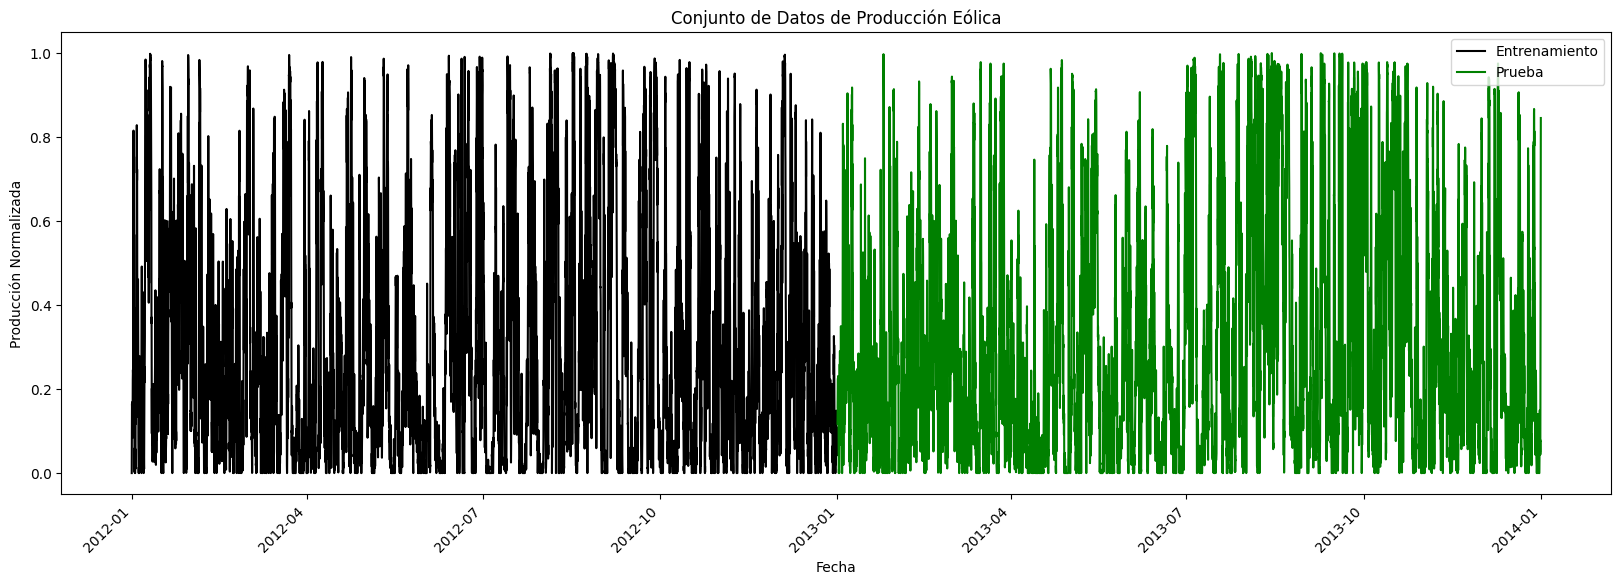

In [62]:
df['Time'] = pd.to_datetime(df['Time'])

df_hist = df[df['Time'] < "2013-01-01 01:00:00"]
df_fut = df[df['Time'] > "2013-01-01 00:00:00"]

plt.figure(figsize=(20, 6))
plt.plot(df_hist['Time'],df_hist['Power'].values, label='Entrenamiento', color='black')
plt.plot(df_fut['Time'],df_fut['Power'].values, label='Prueba', color='green')

# Get all tick locations
ticks = plt.gca().get_xticks()

plt.xticks(rotation=45, ha='right') 
plt.title('Conjunto de Datos de Producción Eólica')
plt.xlabel('Fecha')
plt.ylabel('Producción Normalizada')
plt.legend()